## Imports

In [1]:
# basic imports
import os 
import glob

# sci python and visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
%matplotlib inline
from sklearn.preprocessing import StandardScaler

# model selection and performance
from sklearn.model_selection import train_test_split,cross_val_score,KFold
from sklearn.metrics import accuracy_score, r2_score, roc_auc_score, classification_report,confusion_matrix
from sklearn.feature_selection import SelectKBest,chi2

#models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
# decorations
from IPython.display import YouTubeVideo

import warnings
warnings.filterwarnings('ignore')

np.random.seed(2)

In [26]:
pd.set_option('display.max_columns',200)
pd.set_option('display.max_rows',680)

In [2]:
glob.glob('*')

['6_MLexplore.ipynb',
 '1_Pure_Truncation_Start_Bal_Ella_Version2-editedJulia.ipynb',
 '3_individual_outcome_determination.ipynb',
 'loan_outcomes_33_150.csv',
 'individual_outcomes_33_150.csv',
 'data.csv',
 '4_merge_predictors_with_outcome.ipynb',
 '2_loan_outcome_determination.ipynb',
 'diaries_trx_trunc_loans_start_bal.csv',
 'binary_y_train.csv',
 'Pure_Truncation_Start_Bal_Ella_Version2.ipynb',
 'data_merged_nocatvars.csv',
 'binary_x_train.csv',
 'binary_x_test.csv',
 'binary_y_test.csv',
 '5_train_test_split.ipynb']

In [3]:
x_train = pd.read_csv('binary_x_train.csv')
x_test  = pd.read_csv('binary_x_test.csv')
y_train = pd.read_csv('binary_y_train.csv')
y_test  = pd.read_csv('binary_y_test.csv')

In [4]:
x_train = x_train.drop(['owner_score'], axis = 1)
x_test  = x_test.drop(['owner_score'], axis = 1)

In [5]:
y_train.columns = ['outcome']
y_test.columns = ['outcome']

## Associations: 

In [8]:
associations = pd.concat([x_train,y_train], axis=1)

In [9]:
associations.outcome.value_counts(normalize=True)

1.0    0.788889
0.0    0.211111
Name: outcome, dtype: float64

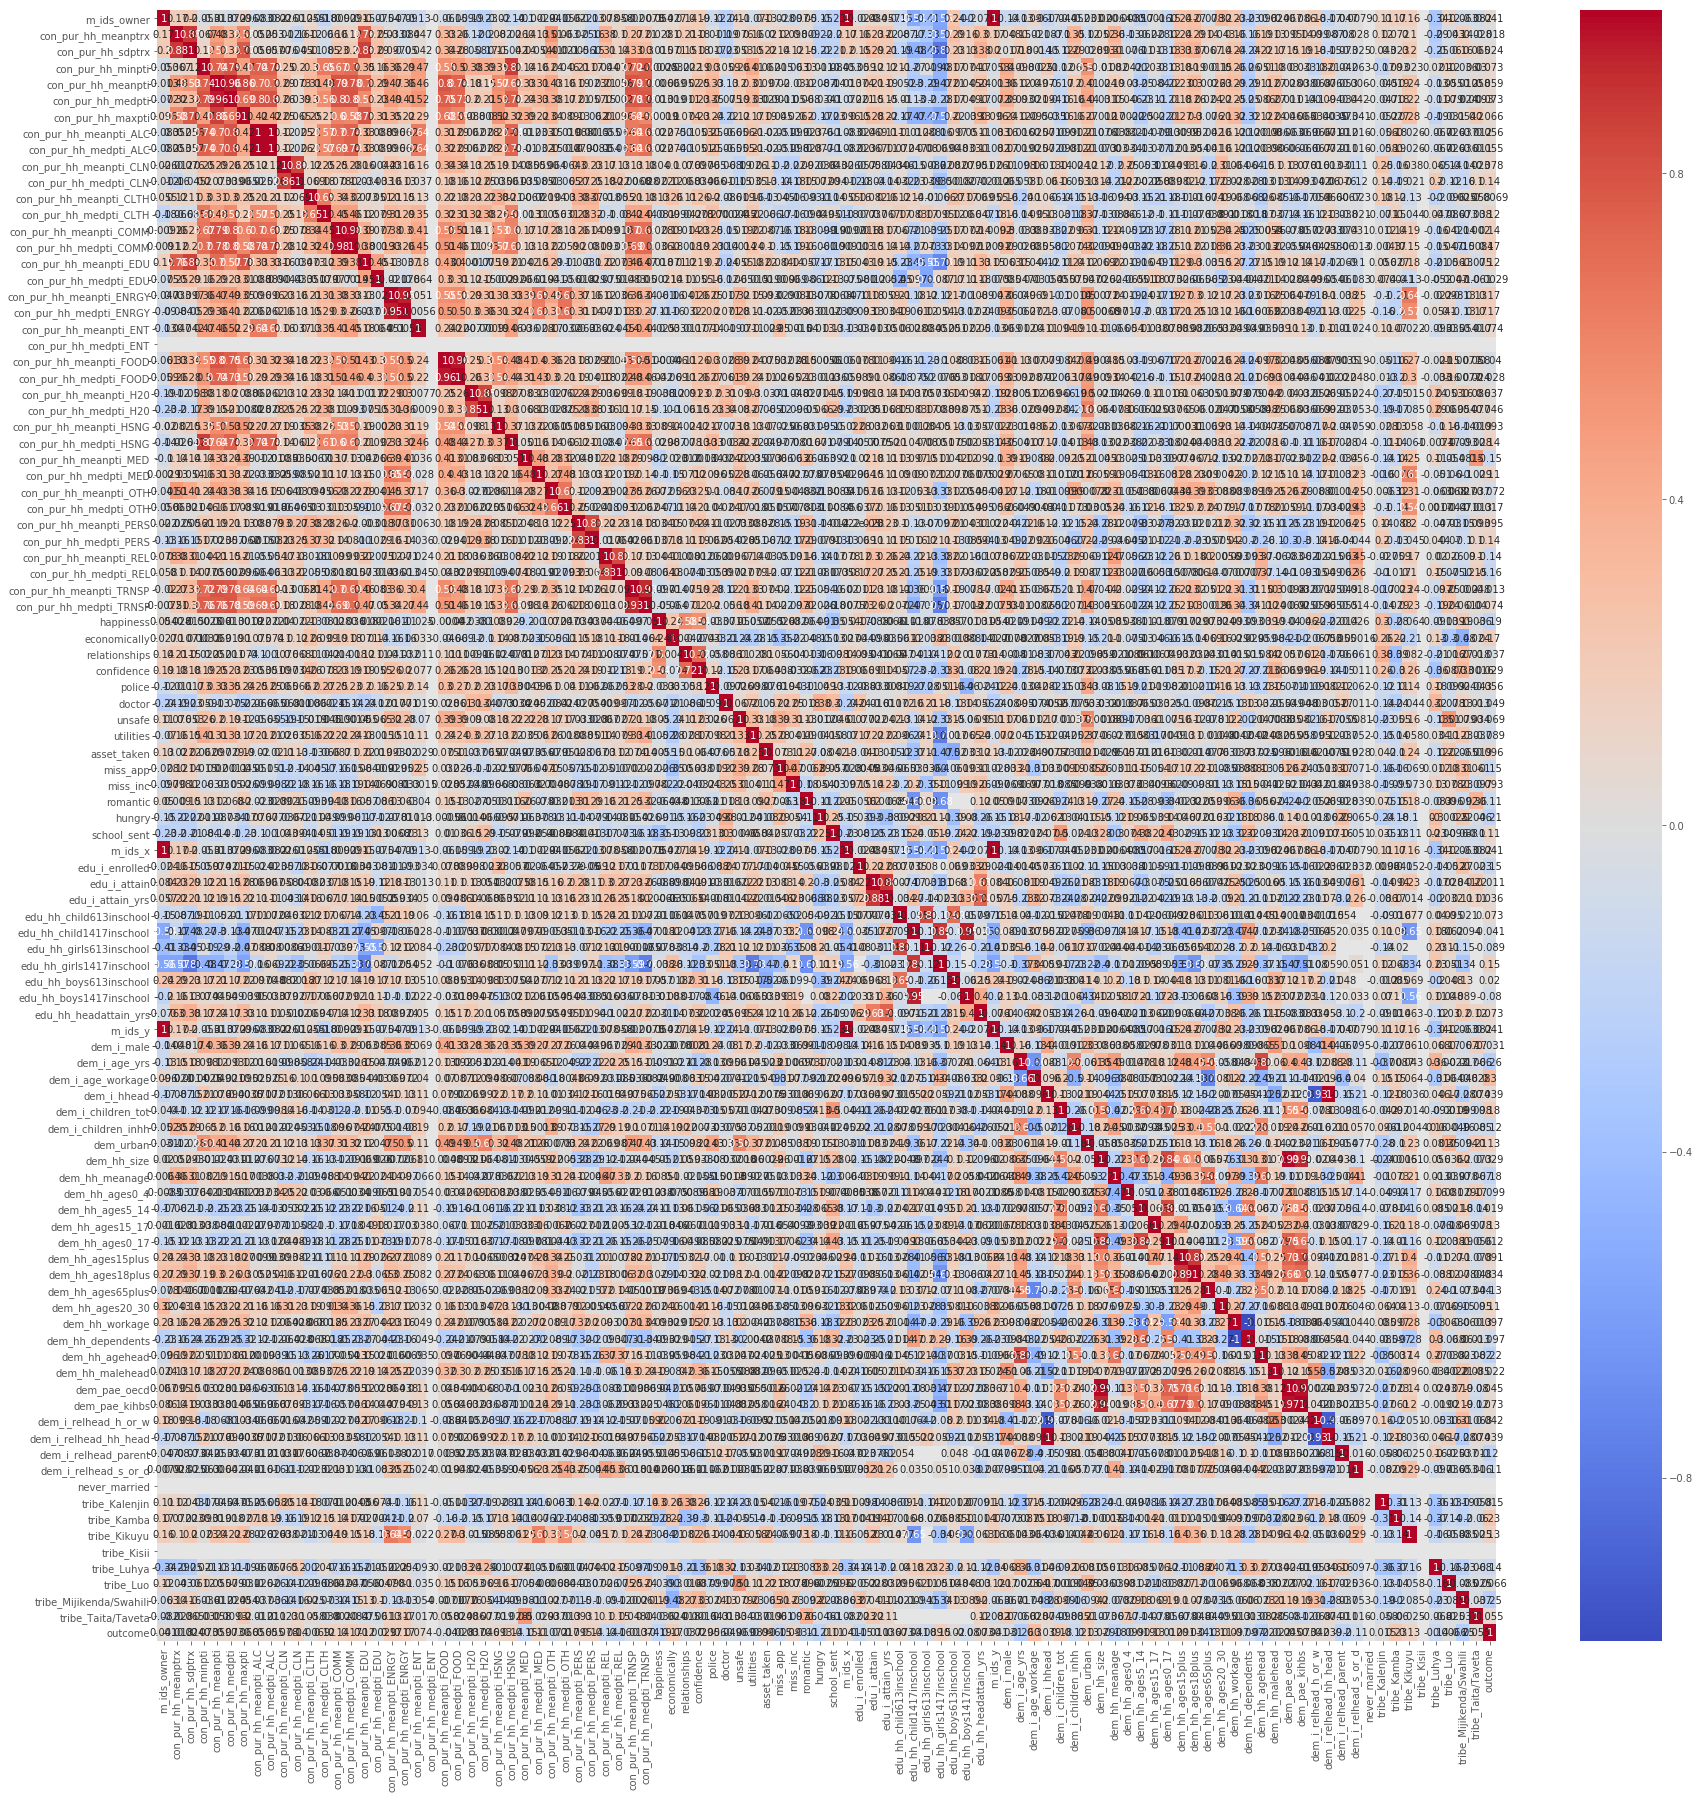

In [10]:
corr = associations[associations.columns].corr()
plt.figure(figsize=(30, 30))
sns.heatmap(corr, annot = True, cmap='coolwarm')

## It appears that there is a lot of correlation among a few features; this makes sense b/c some are mean, some are median measures of the same thing. Let's only keep one of those for now & redo the correlation plot: 

In [11]:
med_cols = [col for col in x_train.columns if 'med' in col]
med_cols

['con_pur_hh_medpti',
 'con_pur_hh_medpti_ALC',
 'con_pur_hh_medpti_CLN',
 'con_pur_hh_medpti_CLTH',
 'con_pur_hh_medpti_COMM',
 'con_pur_hh_medpti_EDU',
 'con_pur_hh_medpti_ENRGY',
 'con_pur_hh_medpti_ENT',
 'con_pur_hh_medpti_FOOD',
 'con_pur_hh_medpti_H20',
 'con_pur_hh_medpti_HSNG',
 'con_pur_hh_medpti_MED',
 'con_pur_hh_medpti_OTH',
 'con_pur_hh_medpti_PERS',
 'con_pur_hh_medpti_REL',
 'con_pur_hh_medpti_TRNSP']

In [12]:
x_train = x_train.drop(med_cols, axis = 1)
x_test  = x_test.drop(med_cols, axis = 1)

In [13]:
associations = pd.concat([x_train,y_train], axis=1)

In [14]:
associations.outcome.value_counts(normalize=True)

1.0    0.788889
0.0    0.211111
Name: outcome, dtype: float64

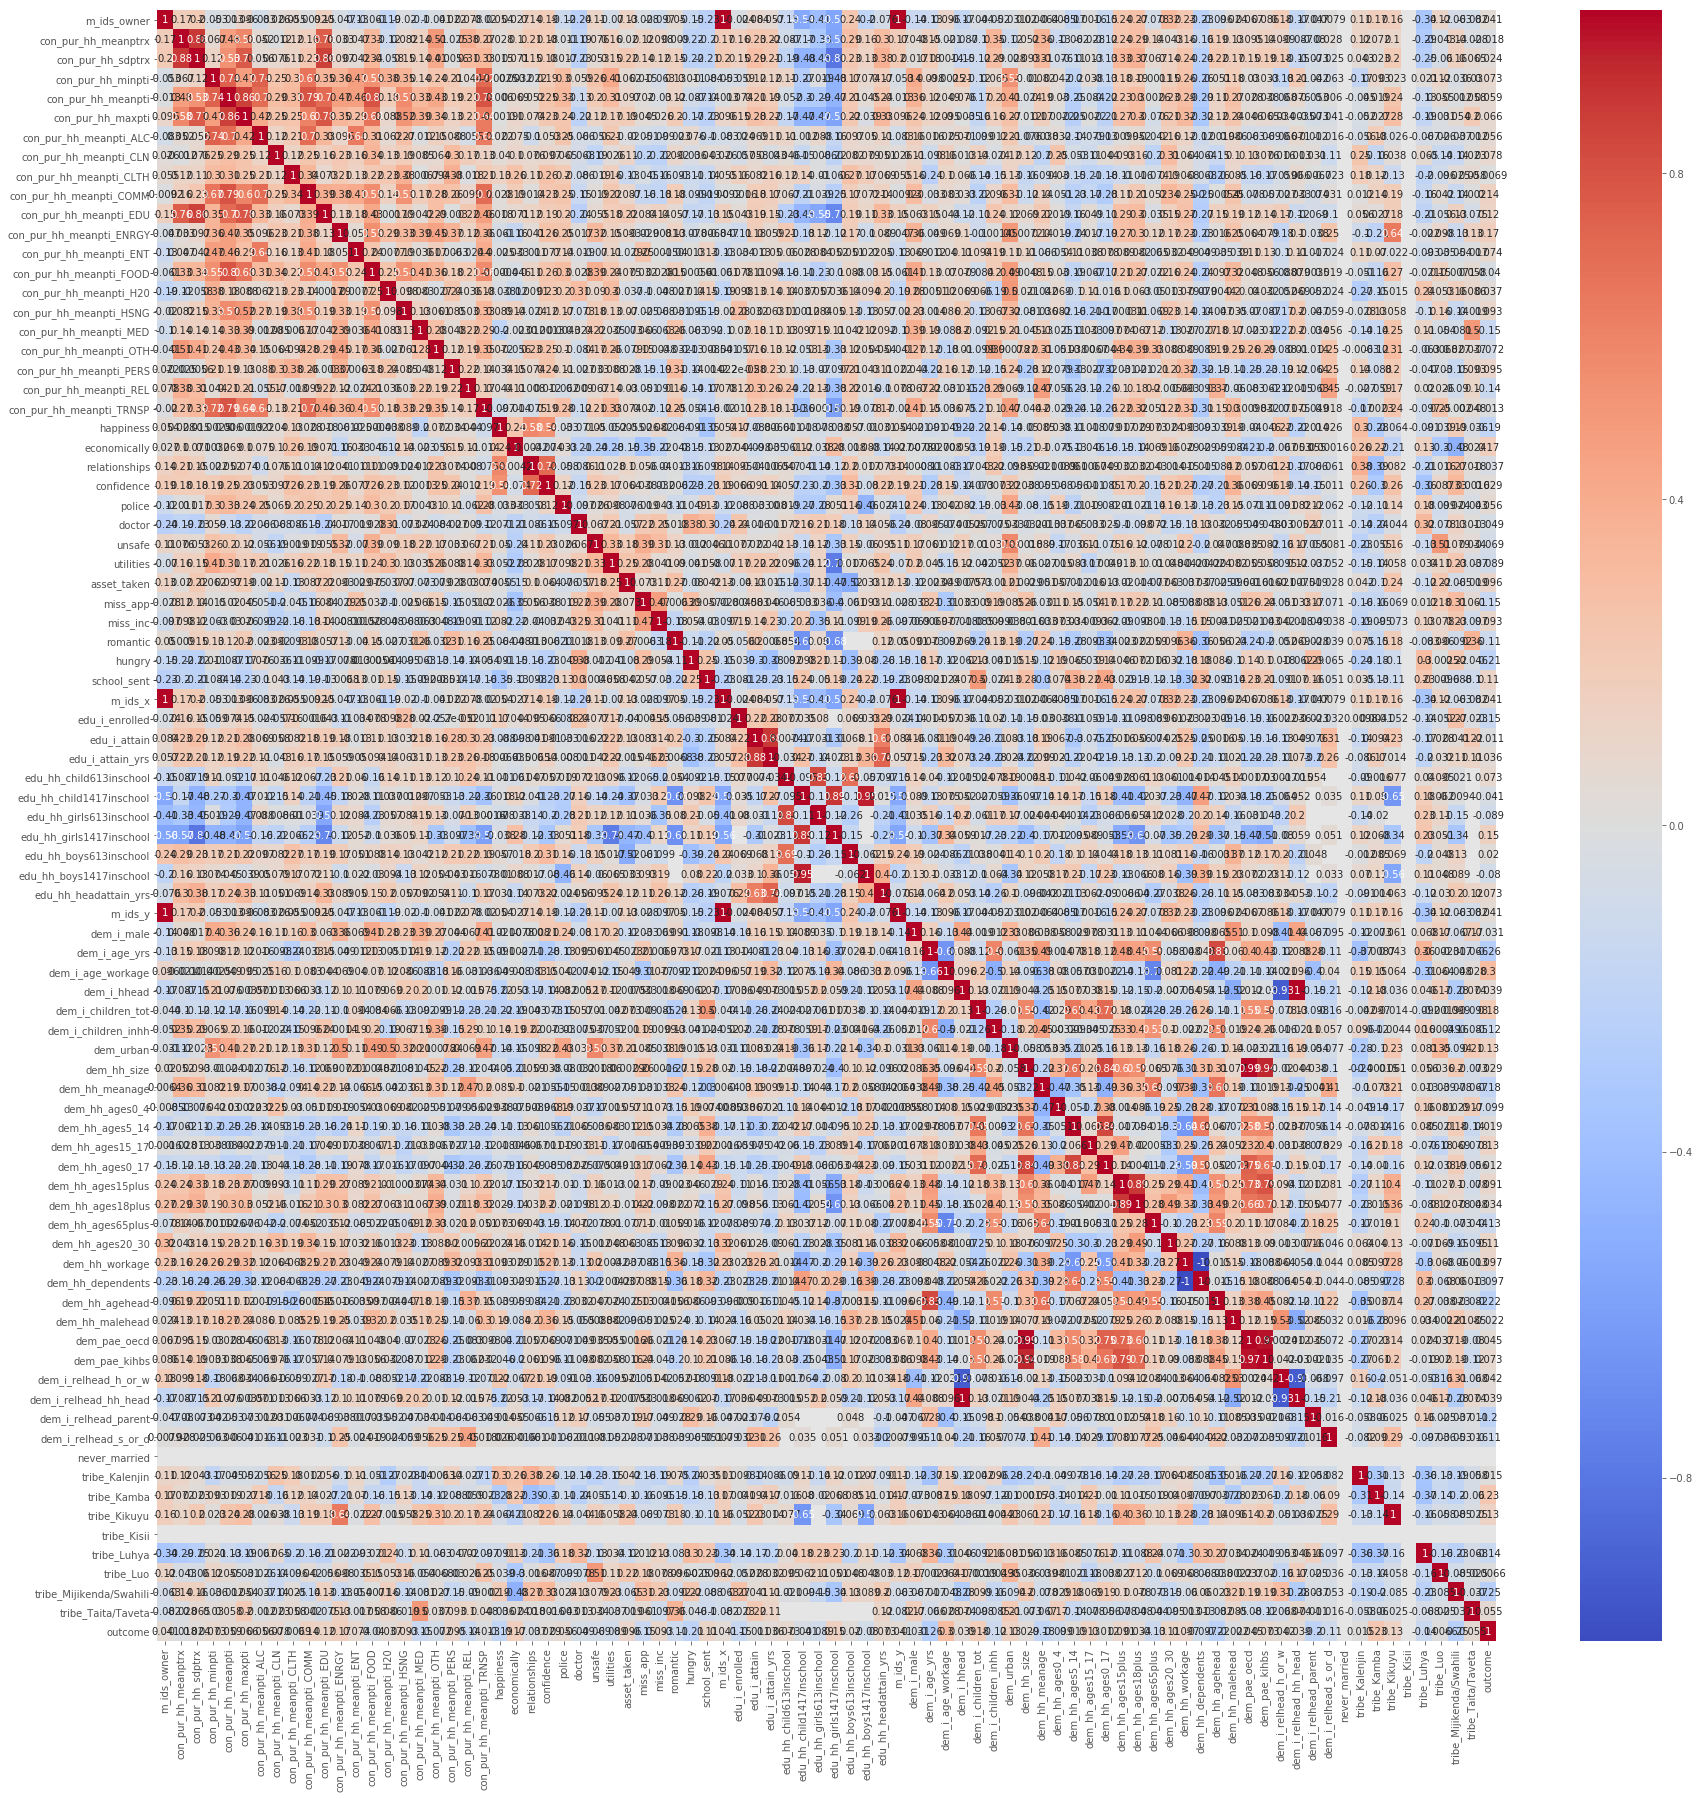

In [15]:
corr = associations[associations.columns].corr()
plt.figure(figsize=(30, 30))
sns.heatmap(corr, annot = True, cmap='coolwarm')

## Inspecting missing values: 

In [30]:
x_train.describe().loc['count'].value_counts()

91.0    73
88.0     2
90.0     2
31.0     1
47.0     1
33.0     1
40.0     1
53.0     1
69.0     1
Name: count, dtype: int64

## Feature selection: 

We may not have to do this, but let's see what pops out: 

In [16]:
x_train.shape

(91, 84)

In [17]:
x_train.dtypes[x_train.dtypes=='object']

hh_ids    object
dtype: object

In [20]:
x_train_hhids = x_train.hh_ids

In [22]:
x_train = x_train.drop(['hh_ids'], axis =1)

In [23]:
select_top_20 = SelectKBest(score_func=chi2, k = 20)
fit = select_top_20.fit(x_train,y_train)
features_20 = fit.transform(x_train)


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').